# Phishing Feature Extraction Demo

This notebook demonstrates extraction of URL features using URLFeatureExtractor and visualizes feature distributions.

In [13]:
import sys
sys.path.append('/mnt/data')
from URL_feature_extractor import URLFeatureExtractor
import pandas as pd

In [14]:
# Load URLs from a CSV file (first column contains URLs)
url_data = pd.read_csv('../../raw/raw/combined_dataset.csv')  # Replace 'urls.csv' with your file path
urls = url_data.iloc[:, 0].tolist()  # Extract first column as list

# Show how many URLs were loaded
print(f"Loaded {len(urls)} URLs from CSV file")
print(f"First 5 URLs: {urls[:5]}")

Loaded 12 URLs from CSV file
First 5 URLs: ['https://sandiafcuarea.weebly.com/', 'https://relais-mondial-relay.info/', 'https://att-106384-100733.weeblysite.com/', 'https://redigbosthknk.web.app', 'https://flowcv.me/jhshshhgs']


In [15]:
extractor = URLFeatureExtractor()
col_names = ['url_length', 'path_depth', 'domain_length', 'num_subdomains', 'num_special_chars', 'num_digits', 'num_hyphens', 'num_underscores', 'has_at_symbol', 'query_length', 'num_query_params', 'contains_ip', 'digit_ratio', 'url_entropy', 'suspicious_word_count']
features = extractor.transform(urls)
df = pd.DataFrame(features, columns=col_names)
df

,url_length,path_depth,domain_length,num_subdomains,num_special_chars,num_digits,num_hyphens,num_underscores,has_at_symbol,query_length,num_query_params,contains_ip,digit_ratio,url_entropy,suspicious_word_count
0,33.0,0.0,24.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,4.271371,0.0
1,34.0,0.0,25.0,0.0,7.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,4.116300,0.0
2,41.0,0.0,32.0,0.0,8.0,12.0,2.0,0.0,0.0,0.0,0.0,0.0,0.292683,4.415377,0.0
3,29.0,0.0,21.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,4.047299,0.0
4,27.0,1.0,9.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3.778424,0.0
5,44.0,1.0,24.0,0.0,10.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,0.250000,4.436260,0.0
6,60.0,1.0,34.0,0.0,10.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.033333,4.402910,0.0
7,43.0,1.0,14.0,0.0,8.0,1.0,0.0,0.0,0.0,12.0,1.0,0.0,0.023256,4.414410,0.0
8,43.0,0.0,34.0,0.0,11.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.000000,4.283953,0.0
9,63.0,1.0,43.0,0.0,8.0,24.0,1.0,0.0,0.0,0.0,0.0,0.0,0.380952,4.687464,0.0


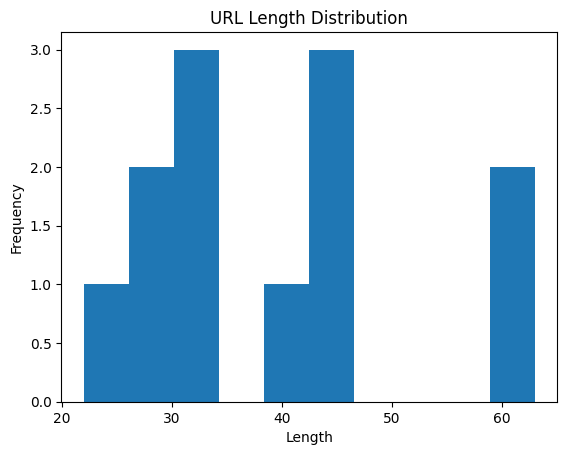

In [16]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(df['url_length'])
plt.title('URL Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

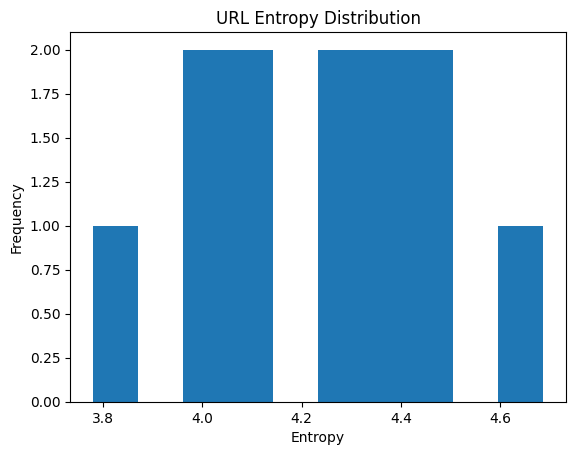

In [17]:
plt.figure()
plt.hist(df['url_entropy'])
plt.title('URL Entropy Distribution')
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.show()

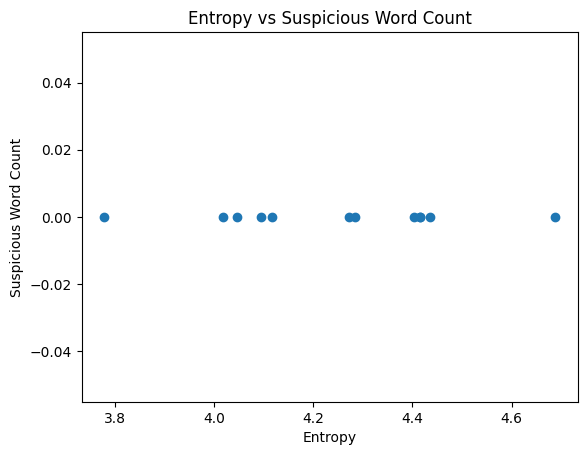

In [18]:
plt.figure()
plt.scatter(df['url_entropy'], df['suspicious_word_count'])
plt.title('Entropy vs Suspicious Word Count')
plt.xlabel('Entropy')
plt.ylabel('Suspicious Word Count')
plt.show()